In [664]:
import pandas as pd
import numpy as np
df=pd.read_csv("youtube_ad_revenue_dataset.csv")
df

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.0,42075.704885,25.490195,210818,Education,Tablet,US,280.986396
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.0,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,NaN,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.0,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811


In [665]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


In [666]:
df.describe()

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
count,122400.000000,116283.000000,116288.000000,116295.000000,122400.000000,122400.000000,122400.000000
mean,9999.856283,1099.633618,274.396636,37543.827721,16.014165,502191.719902,252.727210
std,99.881260,519.424089,129.741739,12987.724246,8.083790,288397.470103,61.957052
min,9521.000000,195.000000,48.000000,14659.105562,2.000142,1005.000000,126.590603
25%,9933.000000,650.000000,162.000000,26366.320569,9.004695,252507.500000,199.902018
50%,10000.000000,1103.000000,274.000000,37531.990337,16.005906,503465.500000,252.749699
75%,10067.000000,1547.000000,387.000000,48777.782090,23.021260,752192.000000,305.597518
max,10468.000000,2061.000000,515.000000,61557.670089,29.999799,999997.000000,382.768254


In [667]:
df["category"].unique()

array(['Entertainment', 'Gaming', 'Education', 'Music', 'Tech',
       'Lifestyle'], dtype=object)

In [668]:
df["device"].unique()

array(['TV', 'Tablet', 'Mobile', 'Desktop'], dtype=object)

In [669]:
df["country"].unique()

array(['IN', 'CA', 'UK', 'US', 'DE', 'AU'], dtype=object)

In [670]:
df.duplicated().sum()

np.int64(2400)

In [671]:
numeric_cols = ['views','likes','comments','watch_time_minutes','video_length_minutes','subscribers','ad_revenue_usd']

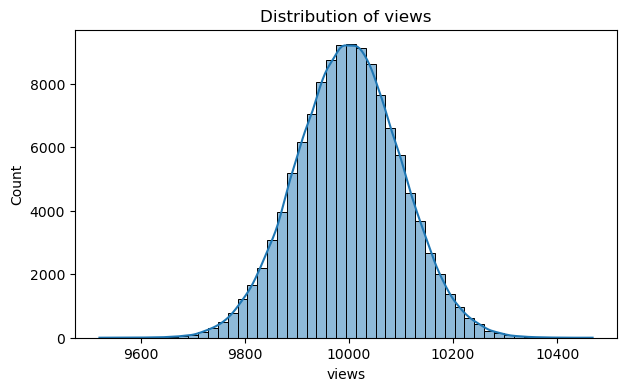

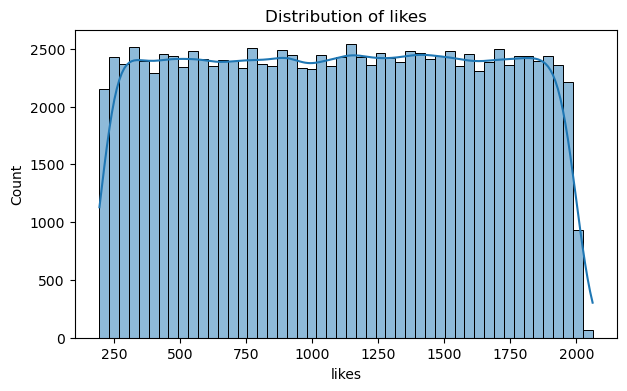

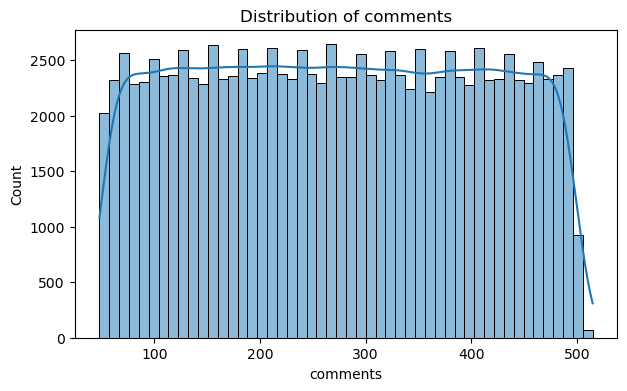

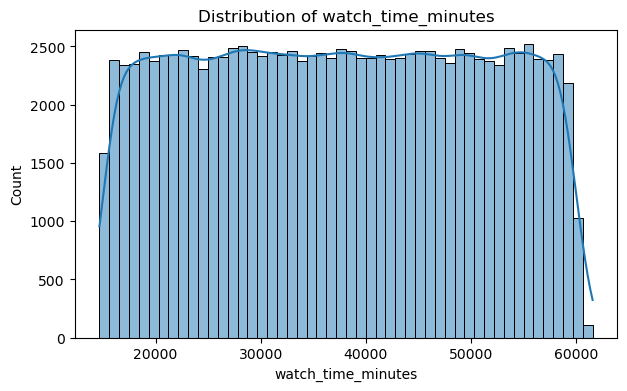

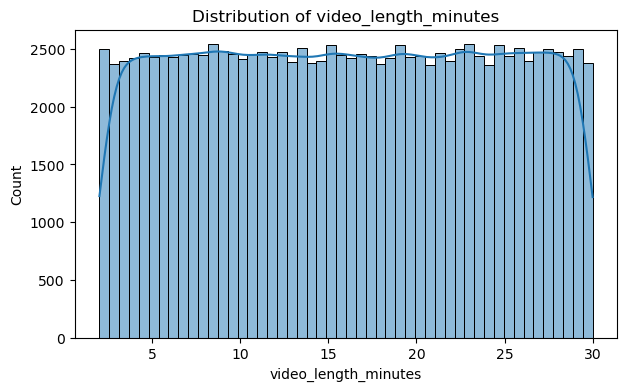

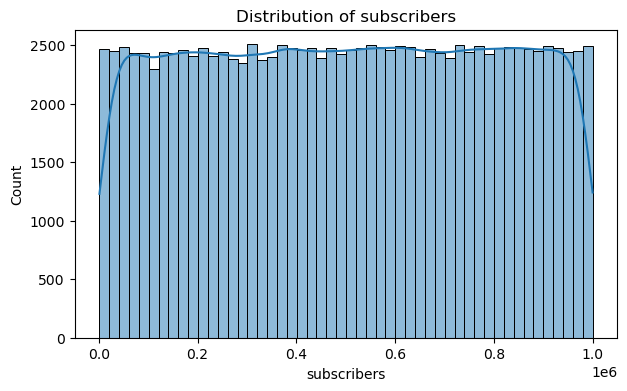

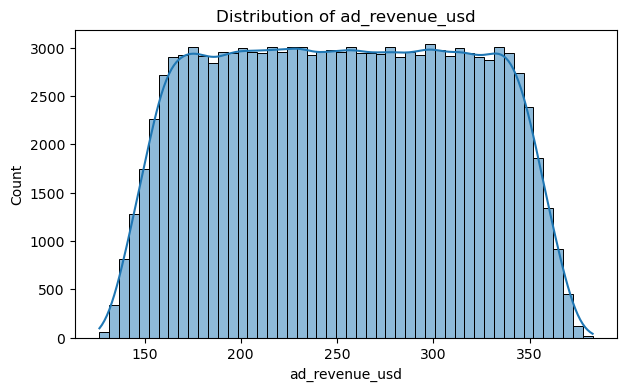

In [672]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in numeric_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [673]:
df.drop_duplicates(inplace=True)
df['likes'] = df['likes'].fillna(df['likes'].mean())
df['comments'] = df['comments'].fillna(df['comments'].mean())
df['watch_time_minutes'] = df['watch_time_minutes'].fillna(df['watch_time_minutes'].mean())

In [674]:
df['engagement_rate']=(df['likes']+df['comments'])/df['views']
df['avg_watch_time_per_view'] = df['watch_time_minutes'] / df['views']

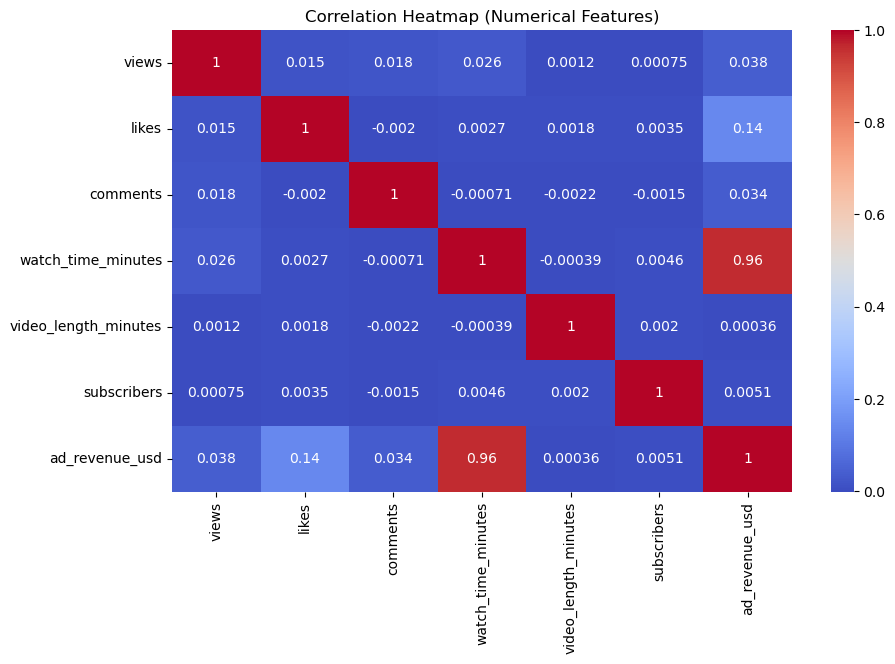

In [675]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

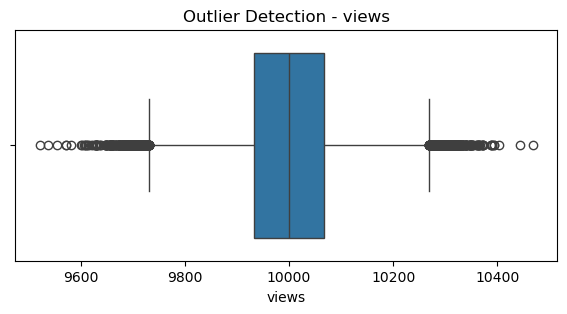

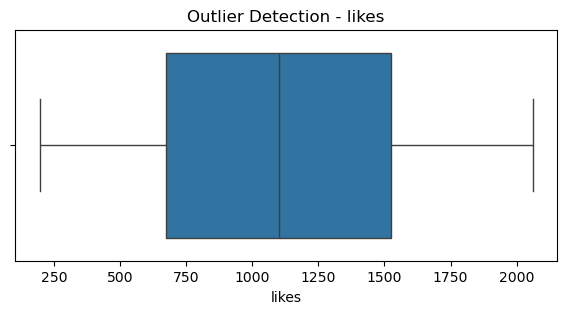

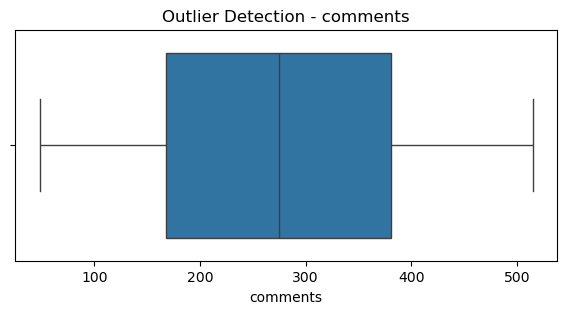

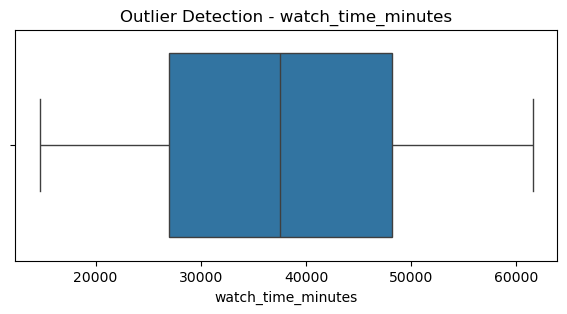

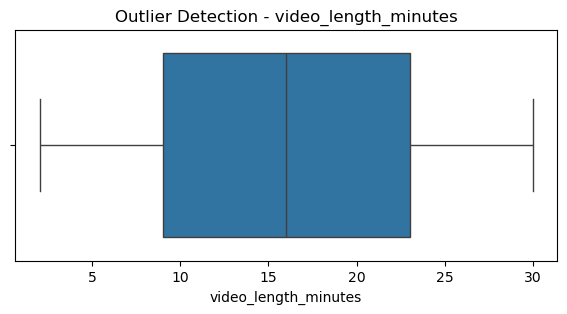

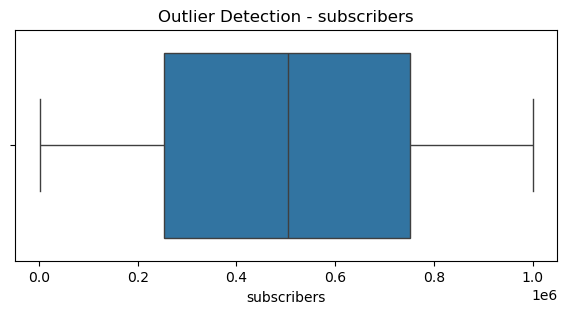

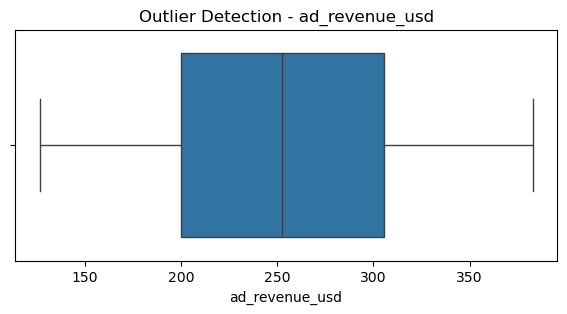

In [676]:
for col in numeric_cols:
    plt.figure(figsize=(7,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Detection - {col}")
    plt.show()

In [677]:
from scipy import stats
for i in numeric_cols:
  print(i,df[i].skew(),df[i].kurtosis())

views -0.0029119685491647176 0.015718421061581722
likes -0.0022591506650926243 -1.1017929783340568
comments 0.008443999313091567 -1.0986921049050051
watch_time_minutes 0.0015704801296750606 -1.1000897444267677
video_length_minutes -0.001861186354134206 -1.2028374870584635
subscribers -0.009575287305932888 -1.1976188204067775
ad_revenue_usd 0.0009478946949712697 -1.1404445685620062


In [678]:
df

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,engagement_rate,avg_watch_time_per_view
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.000000,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237,0.155093,2.666789
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.000000,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508,0.098632,1.518393
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.000000,57332.658498,26.200634,240534,Education,TV,CA,360.134008,0.214519,5.678187
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.000000,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261,0.142814,3.122834
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.000000,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388,0.236121,1.584151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.000000,42075.704885,25.490195,210818,Education,Tablet,US,280.986396,0.184715,4.270345
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.000000,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981,0.174961,5.683620
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,274.349842,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106,0.094901,2.683327
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.000000,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811,0.168164,5.563221


In [679]:
x = df.drop(columns=["ad_revenue_usd", "video_id", "date"], errors="ignore")
y = df["ad_revenue_usd"]

In [680]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((96000, 11), (24000, 11), (96000,), (24000,))

In [681]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import(r2_score, mean_squared_error, mean_absolute_error)
import joblib

models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

cat_features = x_train.select_dtypes(include=['object']).columns
num_features = x_train.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features),
        ('num', 'passthrough', num_features)
    ]
)

results = {}
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    results[name] = {
        "R2": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
    }

results_df = pd.DataFrame(results).T.sort_values("R2", ascending=False)
print(results_df)

                        R2       RMSE       MAE
LinearRegression  0.952574  13.480053  3.111614
GradientBoosting  0.952279  13.521928  3.623577
RandomForest      0.949655  13.888649  3.567672
XGBoost           0.948554  14.039711  4.218519
DecisionTree      0.896485  19.915212  5.404995


C:\Users\Priya Roshini\AppData\Local\Temp\ipykernel_55932\4069367589.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=plot_df, palette="viridis")
C:\Users\Priya Roshini\AppData\Local\Temp\ipykernel_55932\4069367589.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=plot_df, palette="viridis")
C:\Users\Priya Roshini\AppData\Local\Temp\ipykernel_55932\4069367589.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=plot_df, palette="viridis")


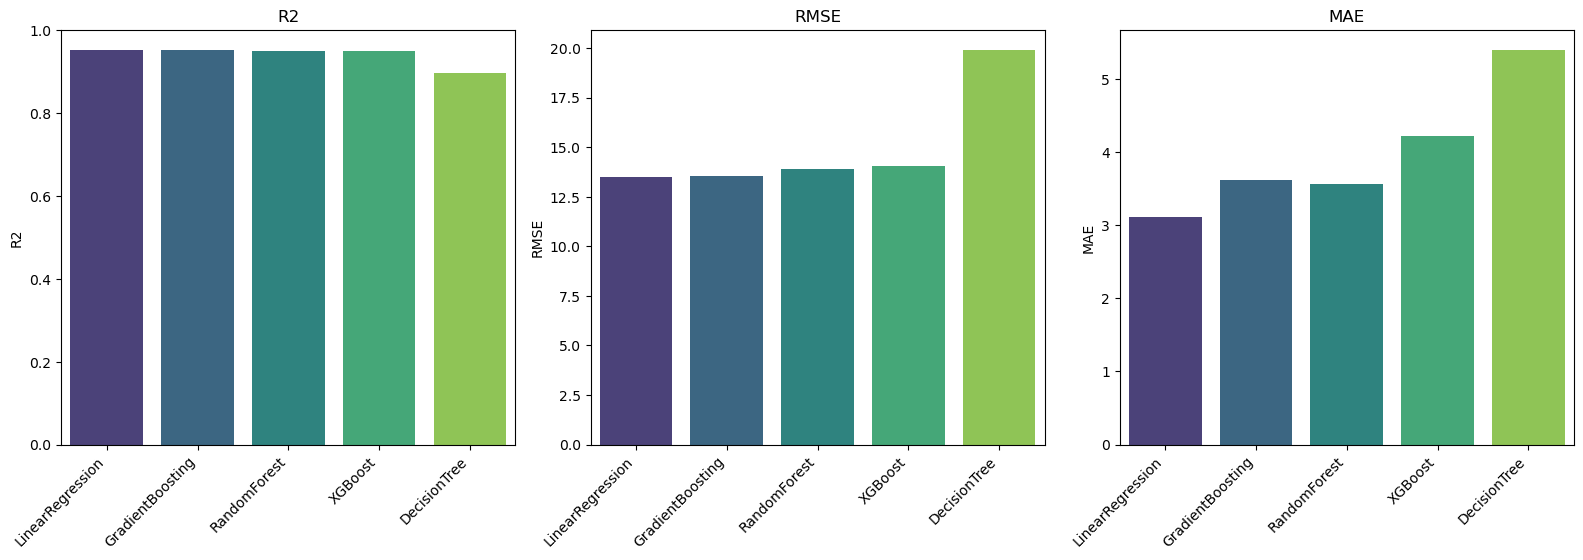

In [682]:
# reset index so "Model" is a column
plot_df = results_df.reset_index().rename(columns={"index": "Model"})

metrics = ["R2", "RMSE", "MAE"]

plt.figure(figsize=(16,10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)   # 2 rows, 3 cols
    sns.barplot(x="Model", y=metric, data=plot_df, palette="viridis")
    plt.xticks(rotation=45, ha="right")
    plt.title(metric)
    plt.xlabel("")
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

In [683]:
num_cols = ["views", "likes", "comments", "watch_time_minutes",
                "video_length_minutes", "subscribers",
                "engagement_rate", "avg_watch_time_per_view"]

cat_cols = ["category", "device", "country"]

In [684]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

In [685]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

In [686]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['views', 'likes', 'comments',
                                                   'watch_time_minutes',
                                                   'video_length_minutes',
                                                   'subscribers',
                                                   'engagement_rate',
                                                   'avg_watch_time_per_view']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['category', 'device',
                                                   'country'])])),
                ('model', LinearRegression())])

In [688]:
joblib.dump(pipeline, "Linear Regression.pkl")
print("✅ Final pipeline saved as Linear Regression.pkl")

✅ Final pipeline saved as Linear Regression.pkl


In [692]:
loaded_pipeline = joblib.load("Linear Regression.pkl")

# Take a few rows from test set
sample_X = x_test.head(5)
sample_y = y_test.head(5)

# Predict
sample_preds = loaded_pipeline.predict(sample_X)

# Print results
print("\n🔎 Sample Predictions vs Actuals:")
for i in range(len(sample_preds)):
    print(f"👉 Predicted: ${sample_preds[i]:.2f} | Actual: ${sample_y.iloc[i]:.2f}")


🔎 Sample Predictions vs Actuals:
👉 Predicted: $352.93 | Actual: $352.85
👉 Predicted: $342.24 | Actual: $341.98
👉 Predicted: $204.56 | Actual: $204.59
👉 Predicted: $176.42 | Actual: $176.84
👉 Predicted: $270.88 | Actual: $270.84
